# Fetch les données brutes

In [1]:
from glacier.data import fetch_data, unzip_to
paths = fetch_data("20260114")
paths

[WindowsPath('C:/Users/Pierre Emery/Documents/Projets/ift3710/projet_glacier/data/raw/glims_v1/NSIDC-0272_glims_db_north_20260114_v01.0.zip'),
 WindowsPath('C:/Users/Pierre Emery/Documents/Projets/ift3710/projet_glacier/data/raw/glims_v1/NSIDC-0272_glims_db_north_20260114_v01.0.zip.md5'),
 WindowsPath('C:/Users/Pierre Emery/Documents/Projets/ift3710/projet_glacier/data/raw/glims_v1/NSIDC-0272_glims_db_south_20260114_v01.0.zip'),
 WindowsPath('C:/Users/Pierre Emery/Documents/Projets/ift3710/projet_glacier/data/raw/glims_v1/NSIDC-0272_glims_db_south_20260114_v01.0.zip.md5')]

### Dézippe les fichiers téléchargers


In [2]:
paths = fetch_data("20260114")
extracted_root = paths[0].parent / "extracted"
extracted_dirs = unzip_to(paths, extracted_root)

# Apperçu du jeu de données brut

In [3]:
from pathlib import Path
from glacier.data.data_fetching import repo_root
import geopandas as gpd
import pandas as pd

In [9]:
root = repo_root()
base = root / "data" / "raw" / "glims_v1" / "extracted"

north = next(p for p in base.rglob("glims_polygons.shp") if "_north_" in str(p).lower())
south = next(p for p in base.rglob("glims_polygons.shp") if "_south_" in str(p).lower())

gdf_n = gpd.read_file(north)
gdf_s = gpd.read_file(south)

len(gdf_n), len(gdf_s), gdf_n.crs

C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_north_20260114_v01.0\glims_download_73053\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(
C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\.venv\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: C:\Users\Pierre Emery\Documents\Projets\ift3710\projet_glacier\data\raw\glims_v1\extracted\NSIDC-0272_glims_db_south_20260114_v01.0\glims_download_05601\glims_polygons.shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(


(616791,
 169129,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

In [10]:
gdf_n.columns
gdf_n.head(3)

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,conn_lvl,surge_type,term_type,gtng_o1reg,gtng_o2reg,rgi_gl_typ,parent_id,submitters,analysts,geometry
0,glac_bound,715234.0,G340953E63564N,1993-09-01T00:00:00,12.414,12.413600,0.0,0.0,0.0,405.0,...,0.0,0.0,9.0,6.0,1.0,None,G340925E63656N,"Sigurdsson, Oddur","Sigurdsson, Oddur","POLYGON ((-19.04472 63.58378, -19.04474 63.583..."
1,glac_bound,1048878.0,G306386E70153N,2020-09-09T00:00:00,0.000,14.933000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,1.0,None,None,"Carrivick, Jonathan L.","Carrivick, Jonathan L.","POLYGON ((-53.67435 70.18178, -53.66553 70.180..."
2,glac_bound,409177.0,G222822E58665N,2015-07-16T00:00:00,0.777,0.776922,0.0,0.0,0.0,2496.0,...,0.0,1.0,9.0,1.0,6.0,19,G222793E58546N,"Cogley, Graham","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...","POLYGON ((-137.17153 58.66963, -137.17016 58.6..."


<Axes: >

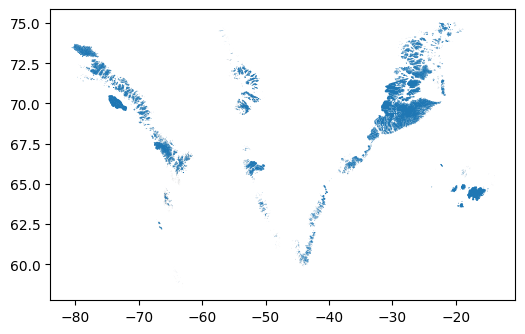

In [12]:
gdf_n.cx[-80:-10, 50:75].plot(figsize=(6, 6))